In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [51]:
# 1.1  파일 읽어오기
filename='player_real_final.csv'
df=pd.read_csv(filename)

## 특성, 타겟 선정
- 특성 : 능력치 7개
- 타겟 : potential

In [52]:
df.position = ['FW' if 'S' in i or 'W' in i or 'F' in i else 'MID' if 'M' in i else 'DF' if 'B' in i else 'GK'  for i in df.position]

In [53]:
df.position.value_counts()

MID    5564
DF     4793
FW     2977
GK     1752
Name: position, dtype: int64

In [54]:
ndf = pd.concat([df.position,df.age,df.iloc[:,-7:], df.potential],axis=1)

In [55]:
ndf = pd.concat([ndf,ndf[ndf.position == 'GK'].sample(sum(ndf.position == 'MID')-2000, replace =True),ndf[ndf.position=='FW']],axis=0)

In [56]:
fwDF = ndf[ndf.position == 'FW']
midDF = ndf[ndf.position == 'MID']
dfDF = ndf[ndf.position == 'DF']
gkDF = ndf[ndf.position == 'GK']

In [57]:
fwDF.corr(numeric_only=True)['potential']

age           -0.300183
attacking      0.515313
skill          0.519896
movement       0.418389
power          0.323246
mentality      0.436190
defending      0.108515
goalkeeping   -0.061027
potential      1.000000
Name: potential, dtype: float64

In [58]:
midDF.corr(numeric_only=True)['potential']

age           -0.312081
attacking      0.481752
skill          0.525913
movement       0.345061
power          0.303307
mentality      0.447737
defending      0.174597
goalkeeping   -0.073948
potential      1.000000
Name: potential, dtype: float64

In [59]:
dfDF.corr(numeric_only=True)['potential']

age           -0.338247
attacking      0.385712
skill          0.351960
movement       0.293453
power          0.296802
mentality      0.443706
defending      0.665210
goalkeeping   -0.066507
potential      1.000000
Name: potential, dtype: float64

In [60]:
gkDF.corr(numeric_only=True)['potential']

age           -0.152268
attacking      0.225868
skill          0.253659
movement       0.328977
power          0.357790
mentality      0.307188
defending      0.182768
goalkeeping    0.163565
potential      1.000000
Name: potential, dtype: float64

In [61]:
ndf.corr(numeric_only=True)['potential']

age           -0.274817
attacking      0.247374
skill          0.274390
movement       0.293115
power          0.265266
mentality      0.282319
defending      0.143888
goalkeeping   -0.042990
potential      1.000000
Name: potential, dtype: float64

### 특성, 타겟 분석

In [62]:
# Scikit-Learn의 PCA 모듈 임포트
from sklearn.decomposition import PCA

# PCA 모델 초기화 및 주성분 개수 설정
pca = PCA(n_components=4)

# 특성 데이터(X)에 PCA 모델을 적합
X_pca = pca.fit_transform(ndf.iloc[:,1:-1])

# 주성분으로 변환된 데이터 출력
print("Transformed Data (2 Principal Components):")
print(X_pca)

# 주성분의 설명된 분산량 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

Transformed Data (2 Principal Components):
[[-52.27561389  42.00851534  21.27786024  -3.04565481]
 [-53.41417691  33.31846991  22.24164837   7.23964036]
 [-50.90165104  40.87730433  23.29044448   5.32533316]
 ...
 [ 19.19797616  15.39634054 -26.19090279  -1.997844  ]
 [  5.82800042   4.36394913 -23.74619612  -6.91871331]
 [ 10.97936485   0.35469936 -23.16531666   4.6335485 ]]
Explained Variance Ratio:
[0.79004576 0.12001833 0.04175985 0.02407406]


In [63]:
# 중요도가 높은 2개의 주성분 선택
top_2_pca_indices = explained_variance_ratio.argsort()[-2:][::-1]
top_2_pca_indices

array([0, 1], dtype=int64)

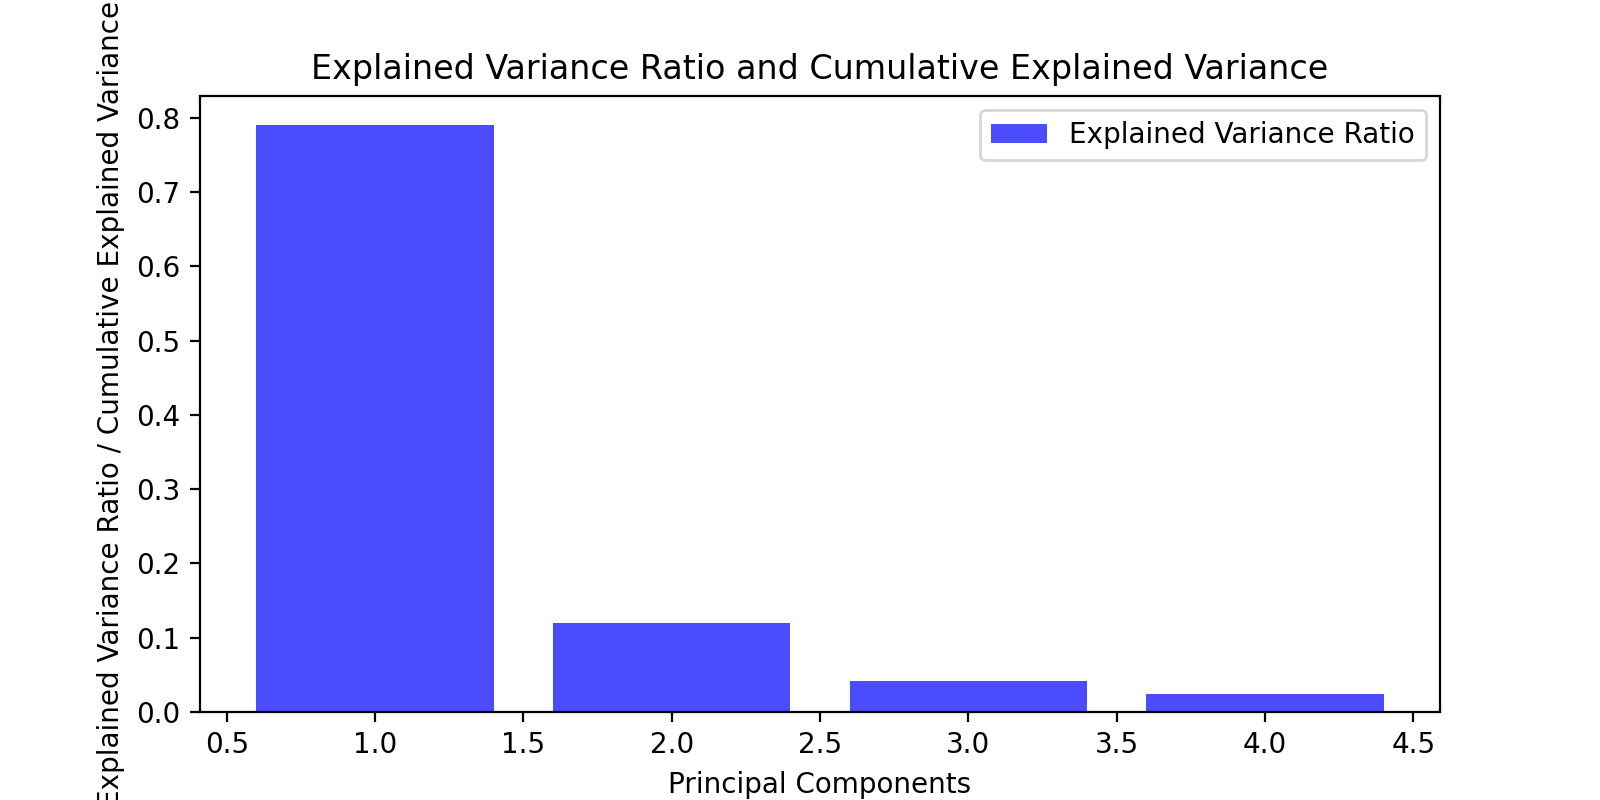

In [64]:
# 주성분 분석 결과에서 설명된 분산량 추출
explained_variance_ratio = pca.explained_variance_ratio_

# 설명된 분산량 및 누적 설명된 분산량 그래프 그리기
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Explained Variance Ratio', color='b')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio / Cumulative Explained Variance')
plt.title('Explained Variance Ratio and Cumulative Explained Variance')
plt.legend()
plt.show()

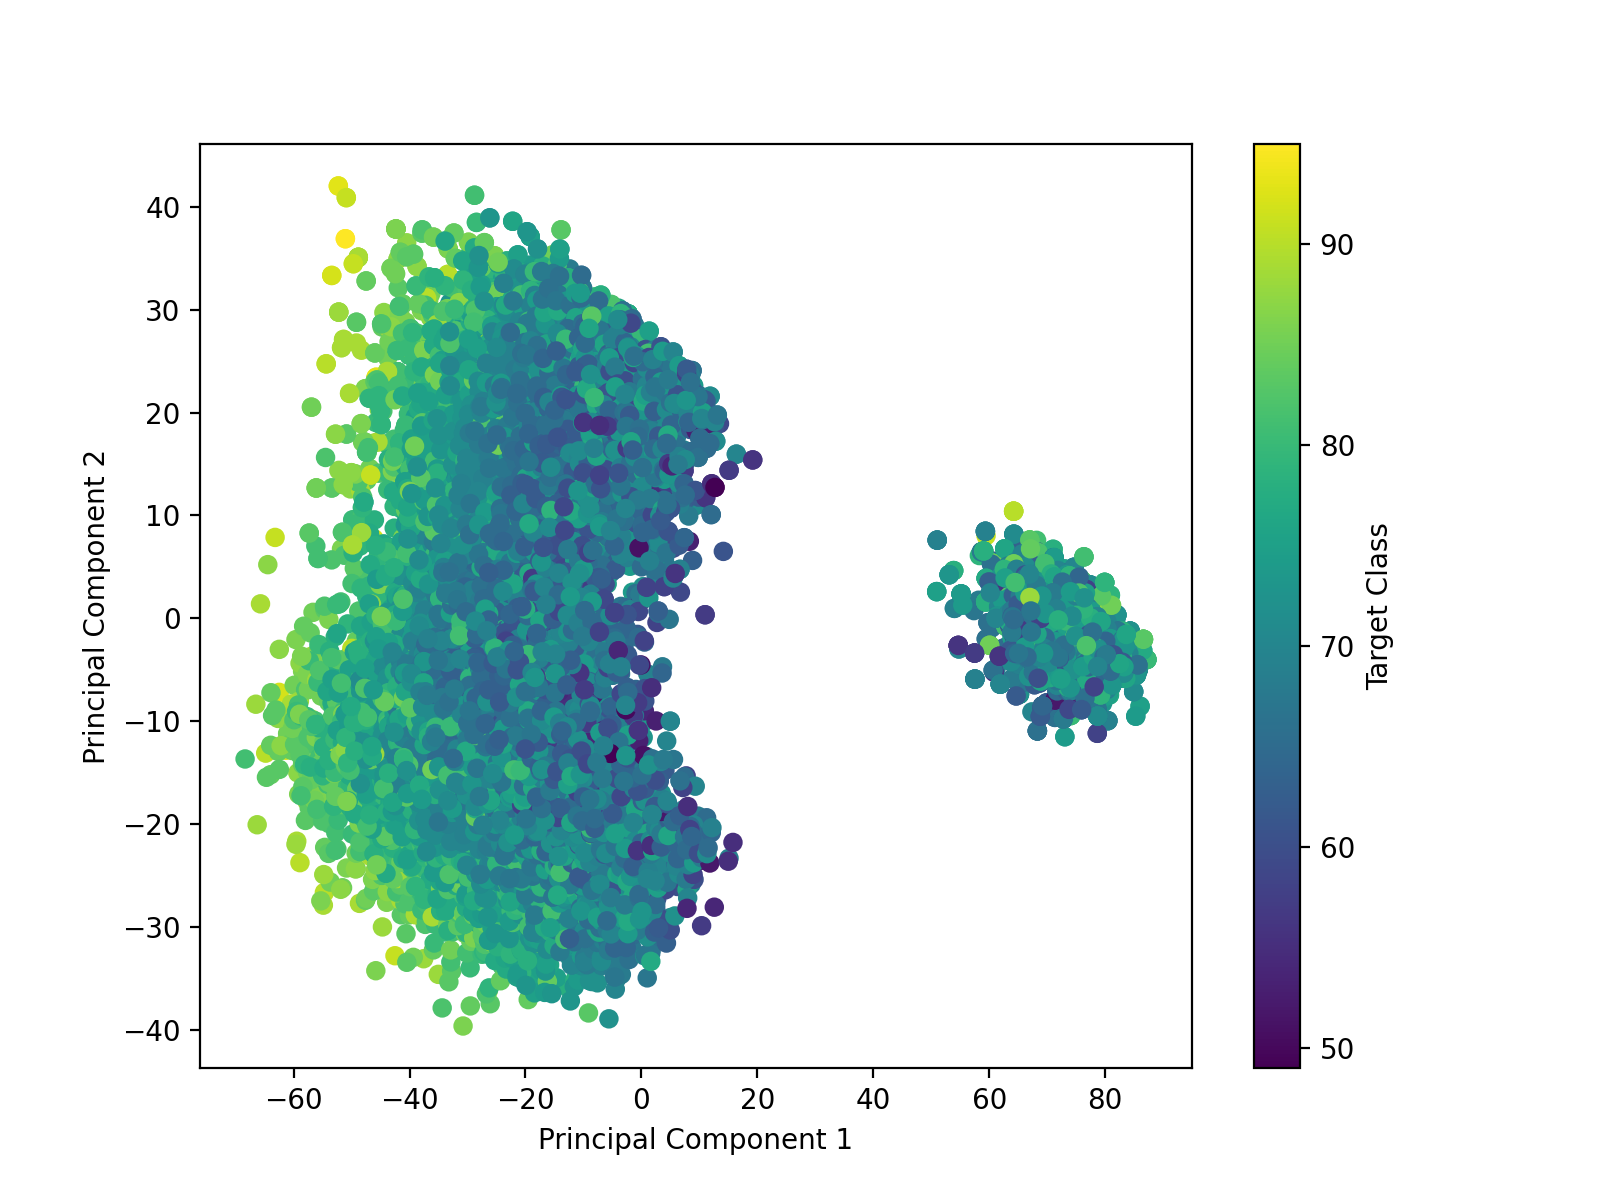

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ndf.potential, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.colorbar(label='Target Class')
plt.show()

In [66]:
from plotnine import *

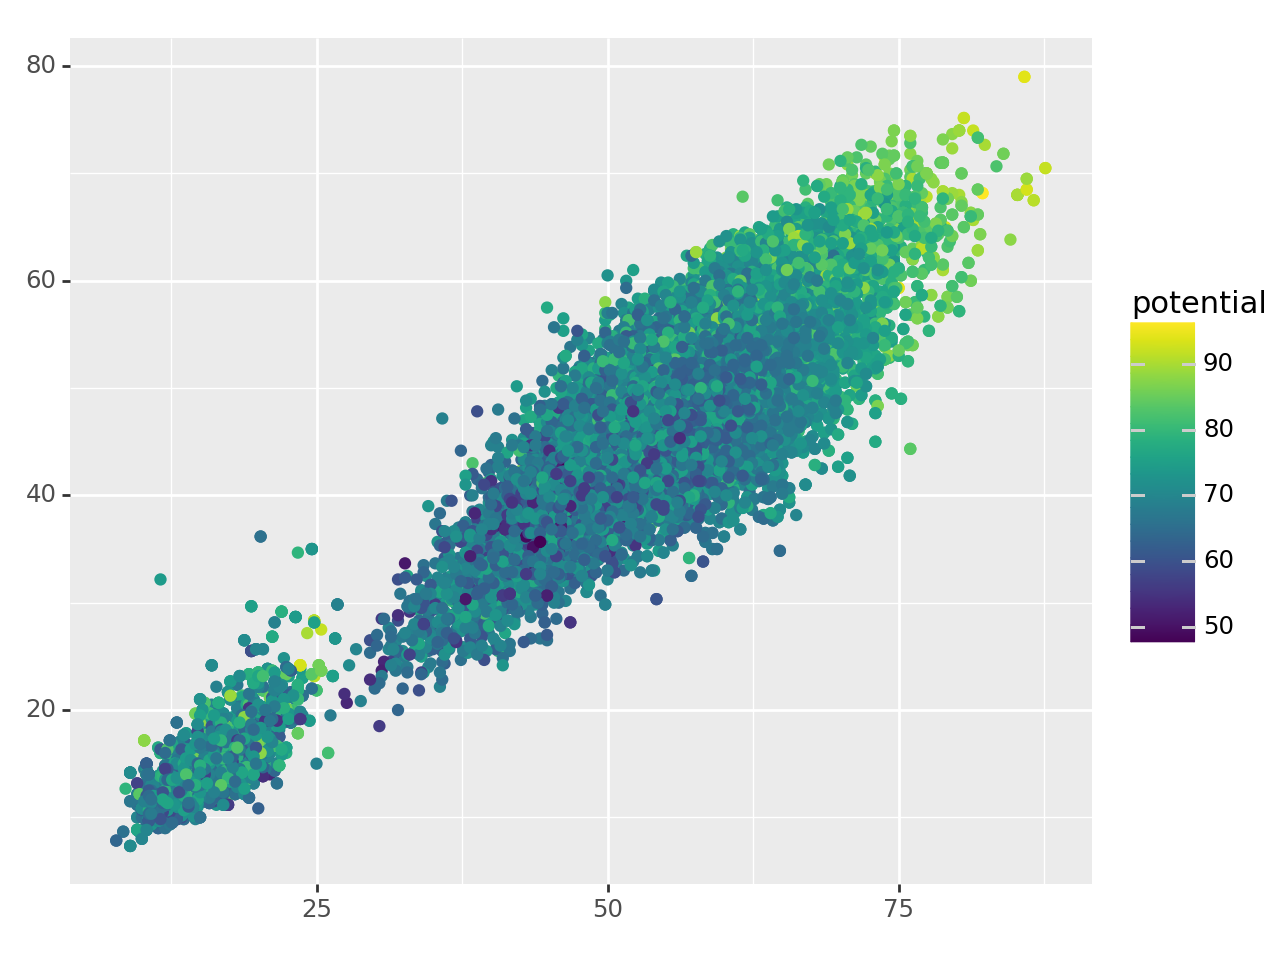

<Figure Size: (640 x 480)>

In [67]:
ggplot(ndf) + geom_point(aes(x=ndf.columns[2], y = ndf.columns[3], color = ndf.columns[-1])) + labs(x='', y='')

주성분분석으로 차원을 2개로 줄였을 때 실제 데이터분포와 비슷하다. 따라서 주성분분석으로 potential을 예측해보겠다.

### 트레인, 테스트 나누고 분석

In [68]:
from sklearn.model_selection import train_test_split

In [70]:
trainX, testX, trainy, testy = train_test_split(X_pca, ndf.iloc[:,-1],
                                               random_state=25,
                                               test_size=0.2,
                                                stratify=ndf.position
                                               )

In [71]:
tr_X, val_X, tr_y, val_y = train_test_split(trainX, trainy, 
                                            test_size=0.2,
                                            random_state=21)

In [141]:
from sklearn.utils import *
from sklearn.metrics import *
import warnings

rets=all_estimators(type_filter='regressor') # 찾는 항목 넣기

result=[]
for name, estimator_ in rets:
    try:
        model=estimator_()
        if 'Logistic' in name or 'SGD' in name or 'MLP' in name:
            model.set_params(max_iter=10000)
        if 'SV' in name:
            model.set_params(max_iter=100000, dual='auto')   
 
        model.fit(trainX,trainy)
        sc=model.score(testX,testy)
        result.append((name, round(sc, 2)))
    except Exception:
        pass

sorted(result, key=lambda x : x[1], reverse=True)

C:\Users\LG\anaconda3\envs\My_Python\lib\site-packages\sklearn\linear_model\_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
C:\Users\LG\anaconda3\envs\My_Python\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast


[('ExtraTreesRegressor', 0.64),
 ('RandomForestRegressor', 0.62),
 ('BaggingRegressor', 0.59),
 ('HistGradientBoostingRegressor', 0.5),
 ('GradientBoostingRegressor', 0.47),
 ('MLPRegressor', 0.47),
 ('KNeighborsRegressor', 0.46),
 ('DecisionTreeRegressor', 0.38),
 ('AdaBoostRegressor', 0.35),
 ('ExtraTreeRegressor', 0.34),
 ('ARDRegression', 0.26),
 ('BayesianRidge', 0.26),
 ('ElasticNet', 0.26),
 ('ElasticNetCV', 0.26),
 ('HuberRegressor', 0.26),
 ('Lars', 0.26),
 ('LarsCV', 0.26),
 ('Lasso', 0.26),
 ('LassoCV', 0.26),
 ('LassoLars', 0.26),
 ('LassoLarsCV', 0.26),
 ('LassoLarsIC', 0.26),
 ('LinearRegression', 0.26),
 ('OrthogonalMatchingPursuitCV', 0.26),
 ('PLSRegression', 0.26),
 ('PoissonRegressor', 0.26),
 ('Ridge', 0.26),
 ('RidgeCV', 0.26),
 ('TransformedTargetRegressor', 0.26),
 ('TweedieRegressor', 0.26),
 ('GammaRegressor', 0.25),
 ('LinearSVR', 0.25),
 ('TheilSenRegressor', 0.16),
 ('RANSACRegressor', 0.13),
 ('OrthogonalMatchingPursuit', 0.04),
 ('DummyRegressor', -0.0),
 

In [72]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(trainX, trainy)

RandomForestRegressor()

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [2000],
    'max_depth': [10,15]} 

# GridSearchCV를 사용하여 최적 하이퍼파라미터 탐색
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(trainX, trainy)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 15], 'n_estimators': [2000]},
             scoring='neg_mean_squared_error')

In [47]:
model = grid_search.best_estimator_
model

RandomForestRegressor(max_depth=15, n_estimators=2000)

In [73]:
model.score(trainX,trainy)

0.9635961845705545

In [74]:
model.score(testX,testy)

0.7395502307315759

In [75]:
model.score(tr_X,tr_y)

0.9632229395236702

In [76]:
model.score(val_X,val_y)

0.9650275954043641

In [80]:
from sklearn.metrics import *
mean_squared_error(tr_y,model.predict(tr_X))

1.349084176300578

In [81]:
pre_pcaX=pca.fit_transform(df.iloc[:,-7:])

In [82]:
pre_y=model.predict(pre_pcaX)

In [83]:
pre_y

array([83.95, 82.41, 82.44, ..., 58.9 , 58.98, 59.04])

In [84]:
potentialDF = pd.DataFrame(pre_y)
potentialDF.columns = ["overall_predict"]

In [86]:
potentialDF.to_csv('potential_predict_age.csv',index=False)

In [23]:
pr = pd.read_csv('potential_predict_age.csv')

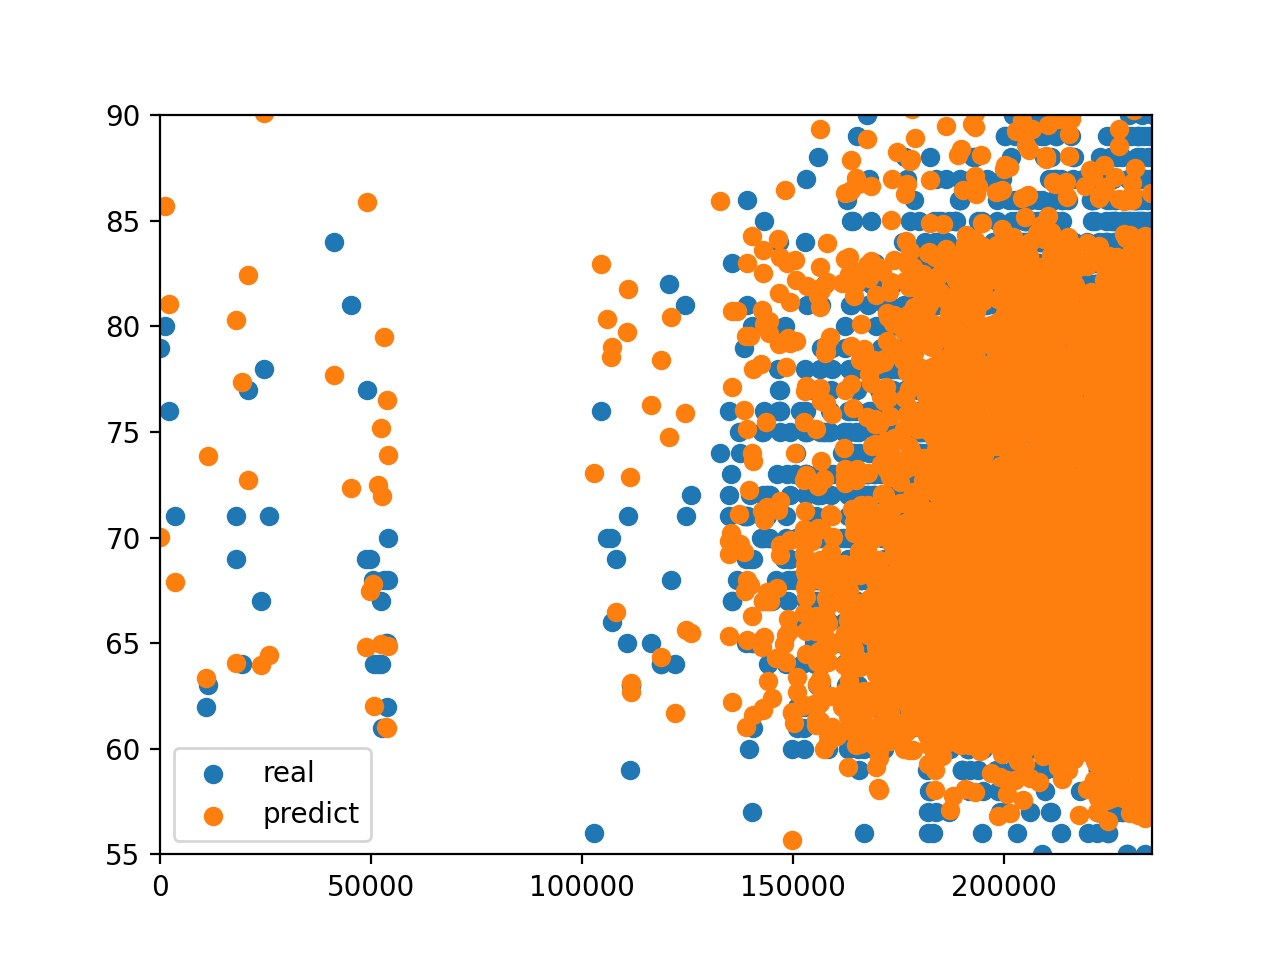

In [28]:
plt.scatter(df.sofifa_id, df.potential, label='real')
plt.scatter(df.sofifa_id, pr.overall_predict, label = 'predict')
plt.xlim(0,235000)
plt.ylim(55,90)
plt.legend()
plt.show()

###  HyperOpt 최적화

In [87]:
from hyperopt import hp, fmin, Trials

In [88]:
# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1사이, learning_rate는 0.01에서 0.2사이 정규 분포 된 값으로 검색
search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1)
}

In [89]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from hyperopt import STATUS_OK, tpe

In [90]:
def objective(search_space):
    # 하이퍼파라미터 적용한 모델 생성
    xgb_model = XGBRegressor(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='rmse')

    # 생성한 모델로 교차 검증 수행
    result = cross_val_score(xgb_model, trainX, trainy, scoring='neg_mean_squared_error', cv=3)
    
    # 평가 결과 반환 ==> HyperOpt 패키지의 fmin() 함수는 최소값을 찾음
    return {'loss': -np.mean(result), 'status': STATUS_OK}

튜닝 최적화

In [91]:
# HyperOpt를 사용하여 하이퍼파라미터 튜닝
trials = Trials()
best = fmin(fn=objective,
            space=search_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials,
            rstate=np.random.default_rng(seed=9))

print(f'best ======>> {best}')

100%|████████████████████████████████████████████████| 50/50 [05:33<00:00,  6.67s/trial, best loss: 11.462756111859669]
best ======>> {'colsample_bytree': 0.949782533600956, 'learning_rate': 0.08398304528710505, 'max_depth': 19.0, 'min_child_weight': 1.0}


In [92]:
# 최적의 하이퍼파라미터를 사용하여 모델을 생성하고 학습
wgb_wrapper = XGBRegressor(n_estimators=400,
                           learning_rate=best['learning_rate'],
                           max_depth=int(best['max_depth']),
                           min_child_weight=int(best['min_child_weight']),
                           colsample_bytree=best['colsample_bytree'])

In [93]:
evals = [(tr_X, tr_y), (val_X,val_y)]

In [94]:
wgb_wrapper.fit(tr_X,tr_y, early_stopping_rounds = 50 , eval_metric = 'rmse', eval_set = evals, verbose=True)

[0]	validation_0-rmse:65.24162	validation_1-rmse:65.26233
[1]	validation_0-rmse:59.80136	validation_1-rmse:59.81784
[2]	validation_0-rmse:54.82090	validation_1-rmse:54.83160
[3]	validation_0-rmse:50.26198	validation_1-rmse:50.26658
[4]	validation_0-rmse:46.08741	validation_1-rmse:46.08928
[5]	validation_0-rmse:42.26656	validation_1-rmse:42.26611
[6]	validation_0-rmse:38.76867	validation_1-rmse:38.76598
[7]	validation_0-rmse:35.56883	validation_1-rmse:35.56236
[8]	validation_0-rmse:32.63963	validation_1-rmse:32.63289
[9]	validation_0-rmse:29.95613	validation_1-rmse:29.94601
[10]	validation_0-rmse:27.50694	validation_1-rmse:27.49772
[11]	validation_0-rmse:25.26079	validation_1-rmse:25.24894


C:\Users\LG\anaconda3\envs\My_Python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
C:\Users\LG\anaconda3\envs\My_Python\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:23.20610	validation_1-rmse:23.19463
[13]	validation_0-rmse:21.33497	validation_1-rmse:21.32386
[14]	validation_0-rmse:19.62337	validation_1-rmse:19.61630
[15]	validation_0-rmse:18.06378	validation_1-rmse:18.05767
[16]	validation_0-rmse:16.63683	validation_1-rmse:16.63545
[17]	validation_0-rmse:15.33567	validation_1-rmse:15.33803
[18]	validation_0-rmse:14.13650	validation_1-rmse:14.14424
[19]	validation_0-rmse:13.04751	validation_1-rmse:13.06158
[20]	validation_0-rmse:12.04732	validation_1-rmse:12.07596
[21]	validation_0-rmse:11.14953	validation_1-rmse:11.18567
[22]	validation_0-rmse:10.32890	validation_1-rmse:10.37716
[23]	validation_0-rmse:9.58293	validation_1-rmse:9.64789
[24]	validation_0-rmse:8.89714	validation_1-rmse:8.98699
[25]	validation_0-rmse:8.27796	validation_1-rmse:8.39298
[26]	validation_0-rmse:7.68972	validation_1-rmse:7.84232
[27]	validation_0-rmse:7.15744	validation_1-rmse:7.35296
[28]	validation_0-rmse:6.67095	validation_1-rmse:6.90664
[29]	vali

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.949782533600956, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08398304528710505,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=19, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [95]:
preds = wgb_wrapper.predict(testX)

In [96]:
preds

array([65.043785, 72.11042 , 71.07682 , ..., 76.32577 , 67.16174 ,
       66.36163 ], dtype=float32)

In [97]:
mean_squared_error(testy, preds)

10.693822215795967

In [98]:
r2_score(testy, preds)

0.7060527990219896